In [14]:
from __future__ import print_function
from bs4 import BeautifulSoup
import requests
from six.moves.urllib import parse
from collections import Counter

In [29]:
base = "https://mapi.yummly.com/mapi/v17/content/feed?tag=list.recipe.other.guided&start={}&limit=10"

r = requests.get(base.format(0))

In [30]:
a = r.json()

In [31]:
len(a['feed'])

10

In [33]:
a['feed'][0].keys()

dict_keys(['display', 'type', 'promoted', 'proRecipe', 'tracking-id', 'seo', 'content'])

In [2]:
import json

In [3]:
with open ('/hri/localdisk/nnabizad/toolpreddata/yummly.json', 'r') as f:
    file = json.load(f)

In [4]:
file[0]['display']['displayName']

'Broccoli and Brown Rice Bowls with Poached Eggs and Red Chilies'

In [53]:
file[0]['content'].keys()

dict_keys(['description', 'urbSubmitters', 'tags', 'preparationSteps', 'videos', 'moreContent', 'tagsAds', 'details', 'relatedContent', 'ingredientLines', 'unitSystem', 'reviews', 'relatedProducts', 'preparationStepCount', 'nutrition', 'yums', 'guidedVariations'])

In [73]:
file[0]['content']

{'description': {'mobileSectionName': 'Description',
  'text': '"Putting an egg on it" makes most dishes more delicious, and this healthy one-bowl meal is no exception. With saltiness from soy sauce, sweetness from brown sugar, crunch from tender-crisp broccoli, and a hint of fire from chiles, the dish will satisfy every tastebud. The recipe is a Yummly original created by Ashley Strickland Freeman.',
  'shortText': None},
 'urbSubmitters': [],
 'tags': {'cuisine': [{'display-name': 'Asian',
    'tag-url': 'cuisine^cuisine-asian'}],
  'nutrition': [{'display-name': 'Source of Omega-3s',
    'tag-url': 'nutrition^nutrition-source-omega-3'},
   {'display-name': 'Low Saturated Fat',
    'tag-url': 'nutrition^nutrition-low-saturated-fat'},
   {'display-name': 'High Vitamin C',
    'tag-url': 'nutrition^nutrition-high-vitamin-c'},
   {'display-name': 'High Protein',
    'tag-url': 'nutrition^nutrition-high-protein'},
   {'display-name': 'High Potassium',
    'tag-url': 'nutrition^nutrition-

In [65]:
file[0]['content']['guidedVariations'][0].keys()

dict_keys(['id', 'default', 'variationAttributes', 'connected', 'actions'])

In [85]:
file[0]['content']['guidedVariations'][0]['actions'][1]['stepGroups'][0]['steps'][0]['equipment']

[{'id': '98674587-cad7-4bcc-926d-41845612c5ea', 'name': 'chef’s knife'},
 {'id': '85acedac-8537-499b-880e-12a751c2b483', 'name': 'cutting board'}]

In [6]:
import pickle as pk
def save_obj(obj, name):
    """
    Saving the pickle object
    """
    with open(name + '.pkl', 'wb') as file:
        pk.dump(obj, file, pk.HIGHEST_PROTOCOL)

In [88]:
titles = []
recs = []
for rec in file:
    titles.append(rec['display']['displayName'])

In [5]:
import inflect
inflect = inflect.engine()
def singular(word):
    """
    Returns a singularized word
    :rtype: str
    """
    head = inflect.singular_noun(word)
    if not head:
        head = word
    return head.lower().strip()

In [210]:
def clean(txt):
    if 'x13' in txt:txt = '9x13-inch baking dish'
    if 'tooth' in txt:txt = 'toothpick'
    if txt == 'sauce pan': txt = 'saucepan'
    if txt == 'sauté pan': txt = 'saute pan'
    if txt == 'springform pan': txt = 'spring form pan'
    return(singular(txt.lower().strip()))


In [211]:
recs = []
titles = []
for rec in file:
    _tmp = []
    if 'guidedVariations' in rec['content'].keys():
        for step in rec['content']['guidedVariations'][0]['actions']:
            if 'equipment' in step['stepGroups'][0]['steps'][0]:
                eqs = tuple([clean(i['name']) for i in step['stepGroups'][0]['steps'][0]['equipment']])
                _tmp.append(eqs)
        if len(_tmp)>0:
            recs.append(_tmp)
            titles.append(rec['display']['displayName'])

In [212]:
len(recs)

659

In [213]:
len(titles)

659

In [214]:
save_obj(recs, 'recepies')

In [215]:
save_obj(titles, 'titles')

In [216]:
recs

[[('measuring cup', 'medium saucepan'),
  ('chef’s knife', 'cutting board'),
  ('cutting board', 'chef’s knife', 'measuring spoon', 'frying pan', 'lid'),
  ('cutting board', 'chef’s knife', 'serving bowl', 'spoon')],
 [('oven',),
  ('9x13-inch baking dish',),
  ('skillet', 'stove', 'rubber spatula'),
  ('large plate', 'paper towel', 'skillet'),
  ('oven', 'oven mitt', 'toothpick'),
  ('oven', 'oven mitt', 'toothpick'),
  ('oven mitt', 'knife', 'spatula', 'serving spoon')],
 [('kitchen scale', 'measuring cup', 'microwave-safe bowl'),
  ('oven',),
  ('cookie dough scoop',
   'baking sheet',
   'silicone baking mat',
   'parchment paper'),
  ('oven', 'oven mitt'),
  ('oven', 'oven mitt'),
  ('oven mitt', 'spatula', 'cooling rack')],
 [('9x5-inch loaf pan',),
  ('oven mitt', 'toothpick'),
  ('oven mitt', 'toothpick'),
  ('oven mitt', 'cooling rack'),
  ('knife',)],
 [('knife', 'cutting board'),
  ('oven mitt', 'toothpick'),
  ('oven mitt', 'toothpick'),
  ('oven mitt', 'bowl')],
 [('sheet 

In [217]:


biglis = recs
biglisencoded = []
min_tool_freq = 1
flatlist = []
for lis in biglis:
    [flatlist.append(i) for i in lis]
counts = sorted(Counter(flatlist).items(), key=lambda x: x[1], reverse=True)
encod = dict()
for i, j in enumerate(counts):
    if j[1] > min_tool_freq:
        encod[j[0]] = i + 2
morethanmin = len(encod)
encod['start'] = 1
encod['unknown'] = morethanmin + 1
encod['end'] = morethanmin + 2
decode = {v: k for k, v in encod.items()}
for lis in biglis:
    _tmp = []
    _tmp.append(encod['start'])  # beg
    for i in lis:
        if i in encod:
            _tmp.append(encod[i])
        else:
            _tmp.append(encod['unknown'])  # unk
    _tmp.append(encod['end'])  ##end
    biglisencoded.append(_tmp)

In [219]:
counts

[(('oven mitt',), 616),
 (('oven',), 179),
 (('oven', 'oven mitt'), 146),
 (('oven mitt', 'toothpick'), 132),
 (('baking sheet', 'parchment paper'), 123),
 (('oven mitt', 'meat thermometer'), 77),
 (('oven mitt', 'fork'), 74),
 (('9x13-inch baking dish',), 71),
 (('oven', 'oven mitt', 'toothpick'), 59),
 (('oven', 'oven mitt', 'meat thermometer'), 58),
 (('knife', 'cutting board'), 42),
 (('sheet pan', 'parchment paper'), 34),
 (('serving spoon',), 33),
 (('spatula',), 33),
 (('baking sheet', 'aluminum foil'), 22),
 (('toothpick', 'oven mitt'), 20),
 (('plate',), 19),
 (('oven mitt', 'serving spoon'), 18),
 (('baking sheet', 'parchment paper', 'silicone baking mat'), 17),
 (('knife',), 16),
 (('oven mitt', 'cooling rack', 'spatula'), 16),
 (('oven', 'oven mitt', 'fork'), 16),
 (('9-inch square pan',), 15),
 (('roasting pan', 'roasting rack', 'aluminum foil'), 15),
 (('oven mitt', 'knife'), 14),
 (('muffin liner', 'muffin pan'), 14),
 (('large pot', 'colander'), 14),
 (('square baking d

In [229]:
scounts = sorted(Counter(flatlist).items(), key=lambda x:x[0])

In [230]:
scounts

[('10-inch nonstick frying pan', 1),
 ('9-inch glass pie plate', 1),
 ('9-inch pie pan', 1),
 ('9-inch square pan', 25),
 ('9x13-inch baking dish', 124),
 ('9x5-inch loaf pan', 10),
 ('aluminum foil', 125),
 ('baking pan', 1),
 ('baking sheet', 276),
 ('baking stone', 1),
 ('baking tray', 1),
 ('bench scraper', 2),
 ('blender', 7),
 ('bowl', 13),
 ('bundt pan', 8),
 ('butter knife', 16),
 ('cake pan', 14),
 ('cake pop stand', 6),
 ('cake pop stick', 7),
 ('cake server', 3),
 ('cake stand', 6),
 ('can opener', 6),
 ('casserole dish', 2),
 ('cast-iron skillet', 18),
 ('cheesecloth', 1),
 ('chef’s knife', 77),
 ('coffee grinder', 1),
 ('colander', 26),
 ('cookie cutter', 1),
 ('cookie dough scoop', 1),
 ('cooling rack', 89),
 ('cupcake liner', 2),
 ('cutting board', 207),
 ('decorating bag', 6),
 ('decorating tip', 9),
 ('dish towel', 1),
 ('double boiler', 4),
 ('dutch oven', 51),
 ('extra-large skillet', 4),
 ('flat plate', 3),
 ('food processor', 14),
 ('fork', 172),
 ('freezer', 4),
 

In [239]:
len(biglisencoded)

659

In [228]:
encod

{'oven mitt': 2,
 'oven': 3,
 'measuring spoon': 4,
 'baking sheet': 5,
 'parchment paper': 6,
 'measuring cup': 7,
 'knife': 8,
 'toothpick': 9,
 'cutting board': 10,
 'rubber spatula': 11,
 'fork': 12,
 'meat thermometer': 13,
 'spatula': 14,
 'tong': 15,
 'aluminum foil': 16,
 '9x13-inch baking dish': 17,
 'spoon': 18,
 'sheet pan': 19,
 'serving spoon': 20,
 'wooden spoon': 21,
 'large mixing bowl': 22,
 'cooling rack': 23,
 'plate': 24,
 'chef’s knife': 25,
 'whisk': 26,
 'large pot': 27,
 'stove': 28,
 'roasting rack': 29,
 'skillet': 30,
 'dutch oven': 31,
 'roasting pan': 32,
 'kitchen scale': 33,
 'silicone baking mat': 34,
 'microwave-safe bowl': 35,
 'large plate': 36,
 'paper towel': 37,
 'platter': 38,
 'serving plate': 39,
 'refrigerator': 40,
 'serving bowl': 41,
 'muffin pan': 42,
 'mixing bowl': 43,
 'colander': 44,
 '9-inch square pan': 45,
 'medium mixing bowl': 46,
 'small bowl': 47,
 'stand mixer': 48,
 'frying pan': 49,
 'large skillet': 50,
 'square pan': 51,
 'o

In [164]:
save_obj(biglisencoded, 'yammly_encoded_tools')
save_obj(encod, 'yammly_encodedic')
save_obj(decod, 'yammly_decodedic')

In [236]:
decod

{2: ('oven mitts',),
 3: ('oven',),
 4: ('oven', 'oven mitts'),
 5: ('oven mitts', 'toothpick'),
 6: ('baking sheet', 'parchment paper'),
 7: ('oven mitts', 'meat thermometer'),
 8: ('oven mitts', 'fork'),
 9: ('9x13-inch baking dish',),
 10: ('oven', 'oven mitts', 'toothpick'),
 11: ('oven', 'oven mitts', 'meat thermometer'),
 12: ('knife', 'cutting board'),
 13: ('serving spoon',),
 14: ('spatula',),
 15: ('sheet pan', 'parchment paper'),
 16: ('baking sheet', 'aluminum foil'),
 17: ('toothpick', 'oven mitts'),
 18: ('plate',),
 19: ('oven mitts', 'serving spoon'),
 20: ('knife',),
 21: ('oven', 'oven mitts', 'fork'),
 22: ('9-inch square pan',),
 23: ('baking sheets', 'parchment paper', 'silicone baking mat'),
 24: ('oven mitts', 'cooling rack', 'spatula'),
 25: ('roasting pan', 'roasting rack', 'aluminum foil'),
 26: ('oven mitts', 'knife'),
 27: ('muffin liners', 'muffin pan'),
 28: ('large pot', 'colander'),
 29: ('square baking dish',),
 30: ('chef’s knife', 'cutting board'),
 3

In [226]:
ntitle = []
for i in titles:
    ntitle.append([i])

In [243]:
ntitle

[['Broccoli and Brown Rice Bowls with Poached Eggs and Red Chilies'],
 ['Sausage and Cheese Egg Casserole'],
 ['Brown Sugar Cookies'],
 ['Gluten-Free Zucchini Bread'],
 ['Herb Roasted Garlic'],
 ['Smoky Roasted Fall Vegetables'],
 ['Vegan Black Bean Enchiladas'],
 ['Asian Baked Chicken Legs'],
 ['Keto Magic Coconut Macaroons'],
 ['One-Bowl Pumpkin Sheet Cake with Chocolate Bourbon Buttercream'],
 ['Vegan Bread Pudding'],
 ['Individual Garlic Parmesan Potatoes Au Gratin'],
 ['Easy Ground Beef Enchiladas'],
 ['Honey Garlic Baked Shrimp'],
 ['Baked Chicken Nuggets'],
 ['Korean Bulgogi'],
 ['Bacon, Potato, and Egg Casserole Bites'],
 ['Basic Vanilla Cupcakes with Vanilla Buttercream'],
 ['Grilled Cheese Pinwheels'],
 ['Sugar-Free Red Velvet Cake'],
 ['Christmas Sugar Cookies'],
 ['Cajun Shrimp, Sausage, and Vegetable Sheet Pan'],
 ['Reduced Carb Cauliflower & Zucchini Tots'],
 ['Ham and Cheese Quiche'],
 ['Sheet Pan Black Bean and Vegetable Breakfast Burritos'],
 ['Apple Cinnamon Coffee Ca

In [169]:
save_obj(ntitle, 'cats')

In [221]:
biglis = recs
biglisencoded = []
min_tool_freq = 1
flatlist = []
for lis in biglis:
    [flatlist.append(j) for i in lis for j in i]
counts = sorted(Counter(flatlist).items(), key=lambda x: x[1], reverse=True)
encod = dict()
for i, j in enumerate(counts):
    if j[1] > min_tool_freq:
        encod[j[0]] = i + 2
morethanmin = len(encod)
encod['start'] = (1,)
encod['unknown'] = (morethanmin + 1,)
encod['end'] = (morethanmin + 2,)
decode = {v: k for k, v in encod.items()}

In [242]:
len(encod)

145

In [233]:
biglisencoded = []
for step in biglis:
    _tmp = []
    _tmp.append(encod['start'])  # beg
    for tools in step:
        _t = []
        for tool in tools:
            if tool in encod:
                if encod[tool] not in _t:
                    _t.append(encod[tool])
            else:
                if encod['unknown'][0] not in _t:
                    _t.append(encod['unknown'][0])  # unk
        _tmp.append(tuple(_t))
    _tmp.append(encod['end'])  ##end
    biglisencoded.append(_tmp)

In [234]:
biglisencoded

[[(1,), (7, 55), (25, 10), (10, 25, 4, 49, 56), (10, 25, 41, 18), (144,)],
 [(1,),
  (3,),
  (17,),
  (30, 28, 11),
  (36, 37, 30),
  (3, 2, 9),
  (3, 2, 9),
  (2, 8, 14, 20),
  (144,)],
 [(1,),
  (33, 7, 35),
  (3,),
  (143, 5, 34, 6),
  (3, 2),
  (3, 2),
  (2, 14, 23),
  (144,)],
 [(1,), (75,), (2, 9), (2, 9), (2, 23), (8,), (144,)],
 [(1,), (8, 10), (2, 9), (2, 9), (2, 66), (144,)],
 [(1,), (19,), (2, 19), (2, 19), (25, 10, 7, 19, 14, 41, 20), (144,)],
 [(1,), (17, 18), (50, 7, 4, 11), (43, 12, 11), (24,), (2,), (2,), (144,)],
 [(1,), (7, 4, 90), (5, 16), (2,), (2, 13), (24,), (144,)],
 [(1,), (5, 6), (2,), (2,), (23,), (144,)],
 [(1,), (17, 6), (2,), (2, 9), (2, 38, 23), (67, 115), (144,)],
 [(1,), (45,), (2,), (2, 9), (57,), (144,)],
 [(1,), (3,), (42,), (3, 2), (3, 2), (2, 8), (144,)],
 [(1,),
  (17, 18),
  (106, 4, 11),
  (7, 43, 11),
  (24,),
  (7, 18, 17),
  (2,),
  (2, 13),
  (20,),
  (144,)],
 [(1,), (17,), (17,), (2,), (2,), (18,), (144,)],
 [(1,), (5, 6), (2,), (2,), (15, 

In [199]:
len(biglis)

659

In [201]:
sum([len(a) for a in biglis])

3364

In [190]:
encod['end'][0]+1

160

In [231]:
save_obj(biglisencoded, 'mlyam_encoded_tools')
save_obj(encod, 'mlyam_encodedic')
save_obj(decod, 'mlyam_decodedic')
save_obj(biglis, 'mlyammly_tools')

In [244]:
biglis

[[('measuring cup', 'medium saucepan'),
  ('chef’s knife', 'cutting board'),
  ('cutting board', 'chef’s knife', 'measuring spoon', 'frying pan', 'lid'),
  ('cutting board', 'chef’s knife', 'serving bowl', 'spoon')],
 [('oven',),
  ('9x13-inch baking dish',),
  ('skillet', 'stove', 'rubber spatula'),
  ('large plate', 'paper towel', 'skillet'),
  ('oven', 'oven mitt', 'toothpick'),
  ('oven', 'oven mitt', 'toothpick'),
  ('oven mitt', 'knife', 'spatula', 'serving spoon')],
 [('kitchen scale', 'measuring cup', 'microwave-safe bowl'),
  ('oven',),
  ('cookie dough scoop',
   'baking sheet',
   'silicone baking mat',
   'parchment paper'),
  ('oven', 'oven mitt'),
  ('oven', 'oven mitt'),
  ('oven mitt', 'spatula', 'cooling rack')],
 [('9x5-inch loaf pan',),
  ('oven mitt', 'toothpick'),
  ('oven mitt', 'toothpick'),
  ('oven mitt', 'cooling rack'),
  ('knife',)],
 [('knife', 'cutting board'),
  ('oven mitt', 'toothpick'),
  ('oven mitt', 'toothpick'),
  ('oven mitt', 'bowl')],
 [('sheet 

#Ingreidants

In [250]:
file[0]['content']['guidedVariations'][0]['actions'][1]['stepGroups'][0]['steps'][0]['ingredientLines']

[{'ingredient': 'garlic cloves',
  'ingredientId': '797b9b50-252b-4440-8fa9-4a71519c8d6a',
  'sortOrder': 0,
  'amount': {'metric': {'unit': {'id': '203f101c-fe8f-102c-a985-0030485841f8',
     'name': '',
     'abbreviation': '',
     'plural': '',
     'kind': 'count',
     'round?': False,
     'decimal': False},
    'quantity': 4},
   'imperial': {'unit': {'id': '203f101c-fe8f-102c-a985-0030485841f8',
     'name': '',
     'abbreviation': '',
     'plural': '',
     'kind': 'count',
     'round?': False,
     'decimal': False},
    'quantity': 4}},
  'category': 'Fresh Vegetables'},
 {'ingredient': 'medium carrots',
  'ingredientId': 'd0961595-18d6-4a13-87be-3e2b9e2c7845',
  'sortOrder': 1,
  'amount': {'metric': {'unit': {'id': '203f101c-fe8f-102c-a985-0030485841f8',
     'name': '',
     'abbreviation': '',
     'plural': '',
     'kind': 'count',
     'round?': False,
     'decimal': False},
    'quantity': 3},
   'imperial': {'unit': {'id': '203f101c-fe8f-102c-a985-0030485841f8'

In [31]:
import string as st
import re
def cleaing(txt):
    words = txt.split()
    for word in words:
        if word in st.punctuation: words.remove(word)
        if word == 'and': words.remove(word)
    txt = ' '.join(words)
    re.sub(r'([^\s\w-]|_)+', '', txt)
    return singular(txt)

In [32]:
recs = []
titles = []
allheads = []
allings = []
for rec in file:
    _tmp = []
    if 'guidedVariations' in rec['content'].keys():
        for step in rec['content']['guidedVariations'][0]['actions']:
            if 'equipment' in step['stepGroups'][0]['steps'][0]:
                eqs = tuple([cleaing(i['ingredient']) for i in step['stepGroups'][0]['steps'][0]['ingredientLines']])
                [allings.append(i) for i in eqs]
                [allheads.append(i.split()[-1]) for i in eqs]
                _tmp.append(eqs)
        if len(_tmp)>0:
            recs.append(_tmp)

In [39]:
len(recs)

659

In [35]:
ingsvocab = [l for j in recs for k in j for i in k for l in i.split()]

In [36]:
set(ingsvocab)

{'85%',
 'active',
 'adobo',
 'all-purpose',
 'allspice',
 'almond',
 'apple',
 'applesauce',
 'apricot',
 'asparagu',
 'au',
 'avocado',
 'baby',
 'bacon',
 'bagel',
 'baguette',
 'baking',
 'ball',
 'balsamic',
 'banana',
 'bar',
 'barbecue',
 'basil',
 'basmati',
 'bay',
 'bean',
 'beansprout',
 'beef',
 'bell',
 'berry',
 'bittersweet',
 'black',
 'blend',
 'blue',
 'blueberry',
 'boiling',
 'bone-in',
 'bone-in,',
 'boneless',
 'boston',
 'bread',
 'breadcrumb',
 'breakfast',
 'breast',
 'brick-style',
 'brisket',
 'broccoli',
 'broth',
 'brown',
 'brussels',
 'buffalo',
 'bulb',
 'butt',
 'butter',
 'buttermilk',
 'butternut',
 'butterscotch',
 'cabbage',
 'cajun',
 'candied',
 'candy',
 'cannellini',
 'canola',
 'caramel',
 'carrot',
 'cashew',
 'cauliflower',
 'cayenne',
 'celery',
 'center-cut',
 'chard',
 'cheddar',
 'cheese',
 'cherry',
 'chicken',
 'chile',
 'chili',
 'chili-garlic',
 'chily',
 'chip',
 'chipotle',
 'chive',
 'chocolate',
 'chop',
 'chopped',
 'chorizo',
 '

In [37]:
save_obj(recs, 'yam_ings')

In [38]:
recs

[[('water', 'long grain brown rice', 'salt'),
  ('garlic clove', 'medium carrot'),
  ('broccoli floret',
   'vegetable oil',
   'toasted sesame oil',
   'crushed red chily',
   'water'),
  ('fresno chile', 'green onion')],
 [(),
  ('nonstick cooking spray',),
  ('breakfast sausage link',),
  (),
  (),
  (),
  ()],
 [('unsalted butter',), (), (), (), (), ()],
 [('nonstick cooking spray',), (), (), (), ()],
 [('garlic',), (), (), ()],
 [('nonstick cooking spray',),
  (),
  (),
  ('italian parsley', 'salt', 'black pepper')],
 [('red enchilada sauce',),
  ('olive oil',
   'black bean',
   'mild diced hatch green chile',
   'salt',
   'black pepper',
   'ground cumin',
   'ground coriander',
   'dried oregano'),
  (),
  ('soft corn tortilla',),
  (),
  ()],
 [('tamari soy sauce',
   'light brown sugar',
   'honey',
   'rice vinegar',
   'sesame oil'),
  ('nonstick cooking spray',),
  (),
  (),
  ('sesame seed', 'scallion')],
 [(), (), (), ()],
 [('cooking oil spray', 'all-purpose flour'), (

In [15]:
counts = sorted(Counter(allings).items(), key=lambda x: x[1], reverse=True)

In [16]:
counts

[('nonstick cooking spray', 219),
 ('salt', 172),
 ('black pepper', 114),
 ('garlic clove', 57),
 ('butter', 48),
 ('granulated sugar', 45),
 ('unsalted butter', 44),
 ('olive oil', 44),
 ('garlic powder', 44),
 ('extra-virgin olive oil', 41),
 ('water', 31),
 ('all-purpose flour', 30),
 ('lemon', 25),
 ('large egg', 24),
 ('grated parmesan cheese', 24),
 ('powdered sugar', 23),
 ('onion', 23),
 ('vanilla extract', 20),
 ('honey', 19),
 ('vegetable oil', 18),
 ('sour cream', 17),
 ('italian seasoning', 17),
 ('egg', 16),
 ('light brown sugar', 14),
 ('canola oil', 12),
 ('yellow onion', 12),
 ('fresh ginger', 12),
 ('dried oregano', 11),
 ('scallion', 11),
 ('cooking oil spray', 11),
 ('fresh cilantro', 11),
 ('shredded mozzarella cheese', 11),
 ('shredded cheddar cheese', 11),
 ('cornstarch', 11),
 ('dried thyme', 11),
 ('ground cumin', 10),
 ('ketchup', 10),
 ('salted butter', 10),
 ('ground cinnamon', 10),
 ('cremini mushroom', 10),
 ('paprika', 9),
 ('heavy cream', 9),
 ('celery ri

In [17]:
len(counts)

480

In [24]:
with open('ingredients_head.csv', 'w+') as f:
    for i in hcounts:
        f.write(i[0]+ ','+ str(i[1])+'\n')

In [19]:
import matplotlib.pyplot as plt
import numpy as np

from skimage import io
%matplotlib inline

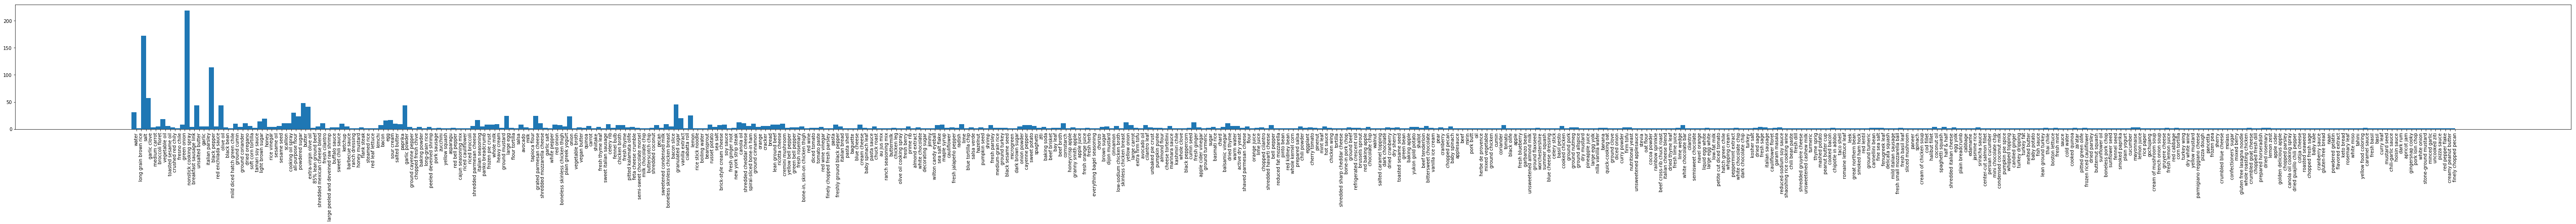

In [20]:
labels, values = zip(*Counter(allings).items())

indexes = np.arange(len(labels))
width = 1
plt.rcParams['figure.figsize'] = [100, 5]
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels,rotation='vertical')
plt.show()

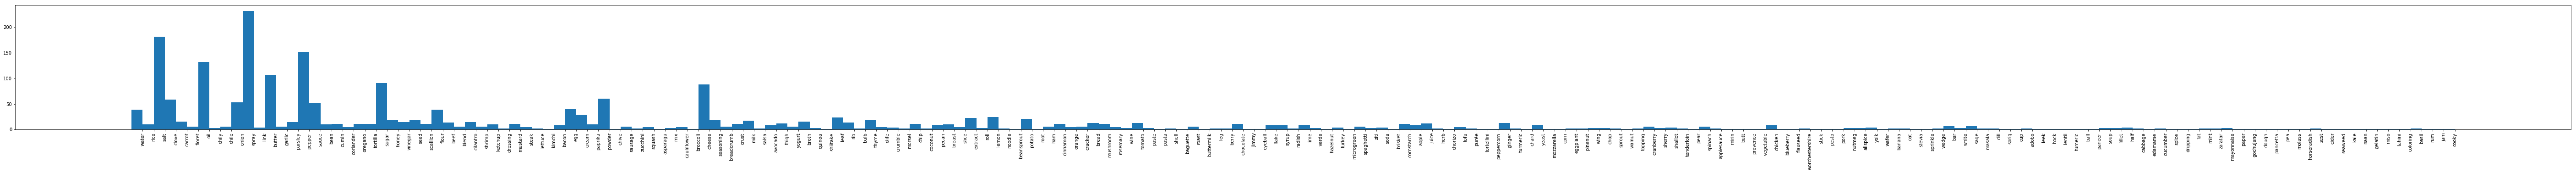

In [25]:
labels, values = zip(*Counter(allheads).items())

indexes = np.arange(len(labels))
width = 1
plt.rcParams['figure.figsize'] = [100, 5]
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels,rotation='vertical')
plt.show()

In [22]:
hcounts = sorted(Counter(allheads).items(), key=lambda x: x[1], reverse=True)

In [23]:
len(hcounts)

209